In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Read Data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df = df[['target',
 'exang',
 'cp',
 'oldpeak',
 'thalach',
 'ca',
 'slope',
 'thal',
 'sex',
 'age',
 'trestbps',
 'restecg']]

In [4]:
train_frac = 0.33
test_frac = 0.33

train_X = df[[c for c in df.columns if c != 'target']].iloc[:int(len(df) * train_frac)].values
train_y = df.target.iloc[:int(len(df) * train_frac)].values

test_X = df[[c for c in df.columns if c != 'target']].iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values
test_y = df.target.iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values

valid_X = df[[c for c in df.columns if c != 'target']].iloc[int(len(df) * (train_frac+test_frac)):].values
valid_y = df.target.iloc[int(len(df) * (train_frac+test_frac)):].values

# Train Models and get Probabilities

In [8]:
model_to_clf = {
    'rf': RandomForestClassifier
}

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


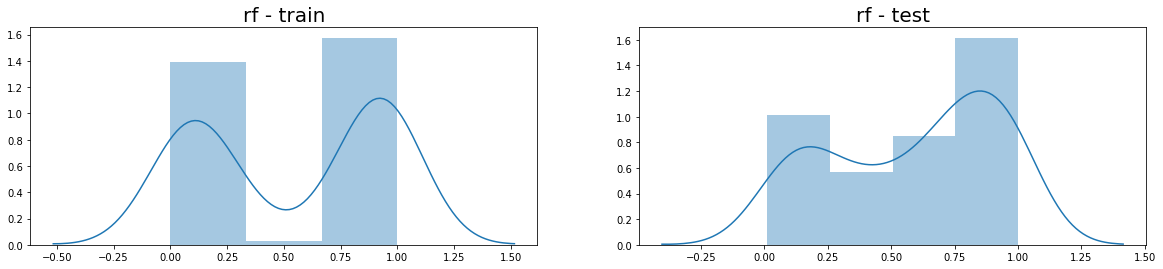

In [9]:
model_to_probs = {}
model_str_to_trained_model = {}

for model_str, model in model_to_clf.items():
    print(model)
    if model == SVC:
        clf = model(probability=True)
    elif model == LogisticRegression:
        clf = model(solver='liblinear')
    else:
        clf = model()
        
    clf.fit(train_X, train_y)
    
    pred_probs_train = clf.predict_proba(train_X)[:,1]
    pred_probs_test = clf.predict_proba(test_X)[:,1]
    pred_probs_valid = clf.predict_proba(valid_X)[:,1]
    
    model_to_probs[model_str] = {'train': pred_probs_train, 'test': pred_probs_test, 'valid': pred_probs_valid}
    
    plt.figure(figsize=(20,4))
    
    plt.subplot(1,2,1)
    sns.distplot(pred_probs_train)
    plt.title(f"{model_str} - train", fontsize=20)
    
    plt.subplot(1,2,2)
    sns.distplot(pred_probs_test)
    plt.title(f"{model_str} - test", fontsize=20)
    
    model_str_to_trained_model[model_str] = clf

# Plot Predicted Probabilities vs Empirical Probabilities

In [17]:
# Model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay


Text(0.5, 1.0, 'Calibration plot (Log Reg)')

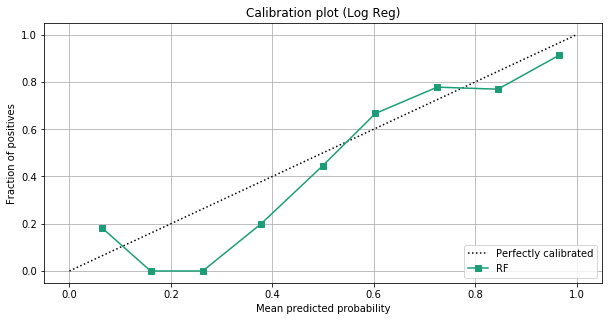

In [20]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}

display = CalibrationDisplay.from_estimator(
    clf,
    test_X,
    test_y,
    n_bins=9,
    name='RF',
    ax=ax_calibration_curve,
    color=colors(0),
)
calibration_displays['LogReg'] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plot (Log Reg)")

In [26]:
y_probs

array([0.01, 0.01, 0.05, 0.06, 0.06, 0.07, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.12, 0.12, 0.13, 0.14, 0.16, 0.18, 0.18, 0.19, 0.2 , 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.31, 0.35, 0.36, 0.39, 0.39,
       0.4 , 0.46, 0.48, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.52, 0.53, 0.59,
       0.6 , 0.62, 0.67, 0.68, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.72, 0.73,
       0.73, 0.73, 0.74, 0.75, 0.75, 0.76, 0.76, 0.76, 0.77, 0.78, 0.8 ,
       0.82, 0.84, 0.84, 0.85, 0.85, 0.85, 0.86, 0.87, 0.87, 0.87, 0.88,
       0.89, 0.9 , 0.93, 0.94, 0.94, 0.94, 0.95, 0.96, 0.96, 0.97, 0.97,
       0.97, 0.97, 0.98, 0.98, 0.98, 0.99, 0.99, 1.  , 1.  , 1.  , 1.  ,
       1.  ])

{'train': array([0.95, 0.82, 0.95, 0.09, 0.28, 0.16, 0.73, 0.98, 0.8 , 0.97, 0.11,
        0.76, 0.95, 0.93, 0.18, 0.85, 0.87, 0.99, 0.94, 0.13, 0.73, 0.06,
        0.86, 0.98, 0.87, 1.  , 0.89, 0.98, 0.08, 0.03, 0.19, 1.  , 1.  ,
        0.25, 0.07, 0.02, 0.99, 0.13, 0.19, 0.21, 0.96, 0.93, 0.95, 0.03,
        0.32, 0.91, 0.  , 0.98, 0.01, 0.13, 0.62, 0.85, 0.1 , 0.03, 0.85,
        0.03, 0.99, 0.06, 0.91, 0.15, 0.97, 0.94, 0.07, 0.11, 0.89, 0.94,
        0.2 , 0.91, 0.08, 1.  , 0.05, 0.26, 0.93, 0.99, 0.13, 0.01, 0.11,
        0.94, 0.32, 0.84, 1.  , 0.01, 0.3 , 0.98, 0.71, 0.02, 0.24, 0.01,
        0.85, 0.95, 0.91, 0.11, 0.99, 0.98, 0.85, 0.02, 0.2 , 0.12, 0.05]),
 'test': array([0.98, 0.35, 0.77, 0.26, 0.53, 0.06, 0.8 , 0.62, 0.85, 0.5 , 0.84,
        0.73, 0.28, 0.48, 0.85, 0.09, 1.  , 0.51, 0.52, 0.23, 0.4 , 0.1 ,
        0.07, 0.98, 0.74, 0.08, 0.52, 0.48, 0.94, 0.76, 0.72, 0.97, 0.98,
        0.7 , 0.93, 0.12, 0.97, 0.75, 0.97, 0.88, 0.76, 0.01, 0.99, 0.07,
        0.16, 0.87,

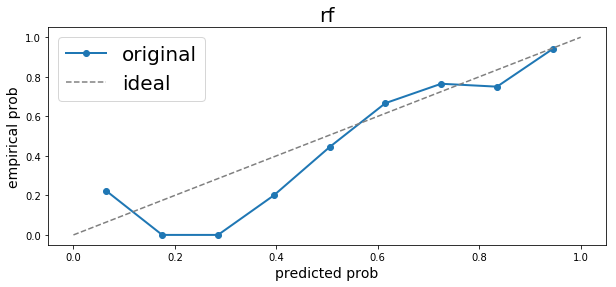

In [21]:
y_probs = clf.predict_proba(test_X)[:,1]
y_probs = pred_prob_dict['test']

y_probs_space = np.linspace(y_probs.min(), y_probs.max(), 10)

empirical_probs = []
y_probs_midpoints = []

for i in range(len(y_probs_space)-1):
    empirical_probs.append(np.mean(test_y[(y_probs > y_probs_space[i]) & (y_probs < y_probs_space[i+1])]))
    y_probs_midpoints.append((y_probs_space[i] + y_probs_space[i+1])/2)

plt.figure(figsize=(10,4))
plt.plot(y_probs_midpoints, empirical_probs, linewidth=2, marker='o')
plt.title(f"{model_str}", fontsize=20)
plt.xlabel('predicted prob', fontsize=14)
plt.ylabel('empirical prob', fontsize=14)

plt.plot([0,1],[0,1],linestyle='--',color='gray')

plt.legend(['original', 'ideal'], fontsize=20)

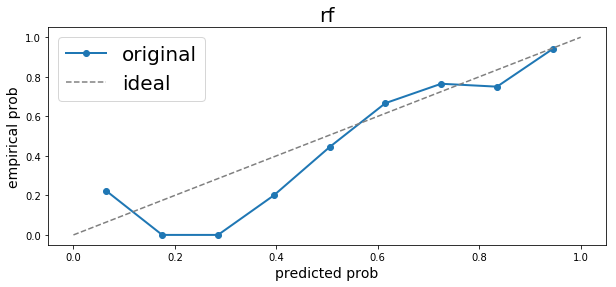

In [10]:
for model_str, pred_prob_dict in model_to_probs.items():
    pred_probs = pred_prob_dict['test']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(test_y[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'ideal'], fontsize=20)

# Calibrate

C:\Users\ritvik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ritvik\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


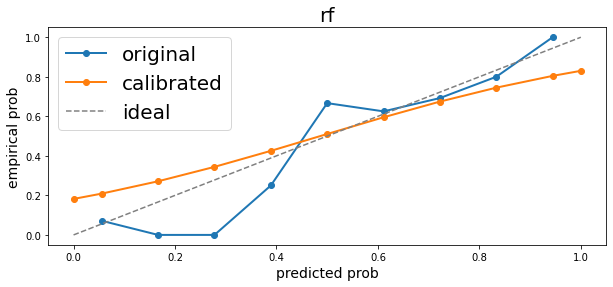

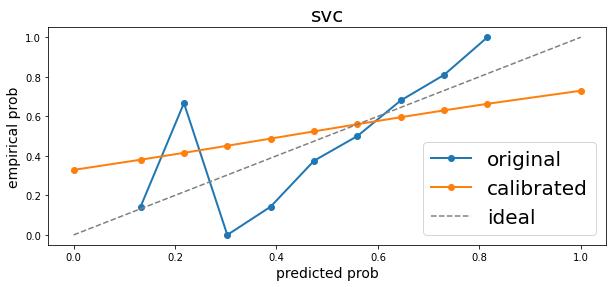

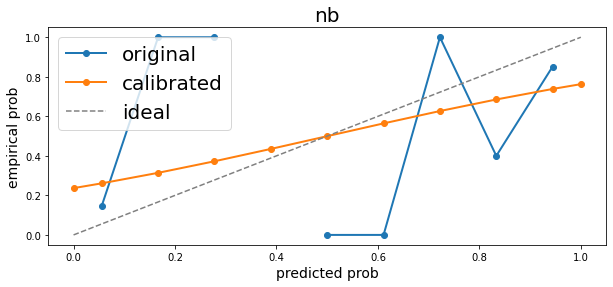

In [8]:
model_str_to_calibrator = {}

for model_str, pred_prob_dict in model_to_probs.items():
    #train calibration model
    lr_model = LogisticRegression()
    lr_model.fit(pred_prob_dict['test'].reshape(-1,1), test_y)
    
    pred_probs = pred_prob_dict['valid']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(valid_y[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    calibrated_probs = lr_model.predict_proba(np.array([0.0]+pred_probs_midpoints+[1.0]).reshape(-1,1))[:,1]
    
    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0.0]+pred_probs_midpoints+[1.0], calibrated_probs, linewidth=2, marker='o')
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'calibrated', 'ideal'], fontsize=20)
    
    model_str_to_calibrator[model_str] = lr_model

# How do we use this?

## (1) Get base model

In [88]:
clf = model_str_to_trained_model['rf']

## (2) Get calibration layer 

In [89]:
lr = model_str_to_calibrator['rf']

## (3) Get calibrated predicted probability using model + calibration

In [85]:
new_sample = np.array([[1, 0, 0.6, 110, 1, 0, 0, 1, 85, 170, 0]])

In [86]:
uncal_prob = clf.predict_proba(new_sample)[:,1][0]
print('Uncalibrated Prob:', uncal_prob)

Uncalibrated Prob: 0.14


In [87]:
cal_prob = lr.predict_proba(np.array([[uncal_prob]]))[:,1][0]
print('Calibrated Prob:', cal_prob)

Calibrated Prob: 0.2553911858824181
